In [2]:
import numpy as np
import pandas as pd
import tweepy
import json
import requests

## Gathering

In this step I import the twitter archive from the .csv file I downloaded containing the full twitter archive for the WeRateDogs Twitter account. I saved the imported .csv files into a dataframe called "dogs". I evaluated the data by looking at the first five records in the dataframe and checking the count of records.

In [3]:
dogs = pd.read_csv('twitter-archive-enhanced.csv',sep=',')

In [4]:
dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
dogs.count()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

Next I pulled the .tsv data from a website using the requests package and a link to the file. I saved the data into a variable "images" then create a file called "weratedogs_img" with the data written to it. I read the file into a dataframe using pd.read_csv then check the first few records of that dataframe and the count of records.

In [6]:
images = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [7]:
images.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [8]:
open('image_predictions','wb').write(images.content)

335079

In [10]:
dog_img = pd.read_csv('image_predictions','\t')

In [11]:
dog_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
dog_img.count()

tweet_id    2075
jpg_url     2075
img_num     2075
p1          2075
p1_conf     2075
p1_dog      2075
p2          2075
p2_conf     2075
p2_dog      2075
p3          2075
p3_conf     2075
p3_dog      2075
dtype: int64

The last data gathering step was to connect to Twitter via API. I connected to my twitter account and used a list of the tweet id's from the "dogs" dataframe to pull all tweet data via Tweepy's get_status() function and append the json portion of the tweet into a new dictionary called data['dog_data']. I used the json package to create a new file called 'json_data.txt' and pulled just the tweet id, retweet count, and favorite count into a new array. I then used the pd.DataFrame function to parse this into a dataframe called 'df'.

In [18]:
consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [19]:
data = {}
data['dog_data'] = []
t_id = dogs['tweet_id']

In [20]:
for x in t_id:
    try:
        tweet = api.get_status(x,tweet_mode='extended',wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
        data['dog_data'].append(tweet._json)
    except:
        data['dog_data'].append(x)

Rate limit reached. Sleeping for: 649
Rate limit reached. Sleeping for: 654


In [21]:
datum = []
with open('tweet_json.txt') as j_file:
    dogdata = json.load(j_file)
    for p in data['dog_data']:
        try:
            datum.append({'id':str(p['id']),
                          'retweet_count':str(p['retweet_count']),
                          'favorite_count': str(p['favorite_count'])
                         })
        except Exception as e:
            datum.append({'id':['id']})

In [22]:
datum[:5]

[{'id': '892420643555336193',
  'retweet_count': '8288',
  'favorite_count': '37949'},
 {'id': '892177421306343426',
  'retweet_count': '6121',
  'favorite_count': '32587'},
 {'id': '891815181378084864',
  'retweet_count': '4054',
  'favorite_count': '24537'},
 {'id': '891689557279858688',
  'retweet_count': '8426',
  'favorite_count': '41291'},
 {'id': '891327558926688256',
  'retweet_count': '9130',
  'favorite_count': '39484'}]

In [24]:
df = pd.DataFrame(datum,columns=['id','retweet_count','favorite_count'])

In [25]:
df.isnull().sort_values('retweet_count')

,id,retweet_count,favorite_count
0,False,False,False
1565,False,False,False
1566,False,False,False
1567,False,False,False
1568,False,False,False
1569,False,False,False
1570,False,False,False
1564,False,False,False
1571,False,False,False
1573,False,False,False


## Data Assessment

In [26]:
df_clean = df.copy()
dogs_clean = dogs.copy()
dog_img_clean = dog_img.copy()

In [27]:
df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8288,37949
1,892177421306343426,6121,32587
2,891815181378084864,4054,24537
3,891689557279858688,8426,41291
4,891327558926688256,9130,39484


In [28]:
dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [29]:
dogs.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [30]:
dog_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Assessment

In [31]:
dogs[dogs['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [32]:
dogs['name'].value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Lola             10
Tucker           10
Penny            10
Winston           9
Bo                9
the               8
Sadie             8
Toby              7
Bailey            7
Buddy             7
an                7
Daisy             7
Stanley           6
Jack              6
Milo              6
Oscar             6
Bella             6
Rusty             6
Dave              6
Scout             6
Leo               6
Jax               6
Koda              6
Bentley           5
               ... 
Reagan            1
Sunshine          1
Tove              1
Ito               1
Norman            1
Coleman           1
Tassy             1
Meatball          1
Nugget            1
Tupawc            1
Jiminus           1
Trevith           1
Izzy              1
Opie              1
Damon             1
unacceptable      1
Jeremy            1
Carbon            1
Jackie            1


In [33]:
dogs[dogs['name'] == 'an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [34]:
dogs.count()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

In [35]:
dogs.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [36]:
dogs.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [37]:
dogs[dogs['rating_numerator'] > 17]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [38]:
dogs.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [39]:
dogs[dogs['rating_denominator'] <10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [40]:
dogs.in_reply_to_status_id.count()

78

In [41]:
dogs.duplicated().sum()

0

In [42]:
dog_img.count()

tweet_id    2075
jpg_url     2075
img_num     2075
p1          2075
p1_conf     2075
p1_dog      2075
p2          2075
p2_conf     2075
p2_dog      2075
p3          2075
p3_conf     2075
p3_dog      2075
dtype: int64

In [43]:
dog_img.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [44]:
dog_img.duplicated().sum()

0

In [45]:
dog_img.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
teddy                         18
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [46]:
dog_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [47]:
dog_img.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [48]:
dog_img.duplicated().sum()

0

In [49]:
df.describe()

,id,retweet_count,favorite_count
count,2356,2338,2338
unique,2339,1708,2000
top,[id],57,0
freq,18,6,167


In [50]:
df[df.isnull().any(axis=1)]

,id,retweet_count,favorite_count
19,[id],NaN,NaN
95,[id],NaN,NaN
101,[id],NaN,NaN
118,[id],NaN,NaN
132,[id],NaN,NaN
155,[id],NaN,NaN
247,[id],NaN,NaN
260,[id],NaN,NaN
298,[id],NaN,NaN
382,[id],NaN,NaN


In [51]:
df.retweet_count.isnull().sum()

18

In [52]:
df.count()

id                2356
retweet_count     2338
favorite_count    2338
dtype: int64

In [53]:
df.dtypes

id                object
retweet_count     object
favorite_count    object
dtype: object

#### quality issues

- Incorrect data types: tweet_id, retweet_count, favorite_count in df; timestamp from dogs
- dogs df - names are incorrec 55 'a' values, 7 'an', 8 'the'
- null values for all columns for 16 records in df
- some tweets in dfs are retweets (181)
- some tweets in dfs are replies (78)
- Rating numerator/denominators are off in 'dogs' dataframe
- Missing some expanded urls from 'dogs' dataframe
- dog names are missing

#### Tidiness Issues

- retweet and favorite counts for tweets from df missing from the dogs dataframe
- image urls are missing from main 'dogs' df
- multiple columns for the dog stages variable (e.g. doggo, floofe, etc)
- retweet/favorites descriptor columns (e.g. retweet_status_id) in dogs dataframe

## Cleaning

### Define
1. Remove rows with missing data & remove non-unique values from dataframe 'df'

I removed all the null rows that did not have a tweet id match when I created the 'df' dataframe by isolating just the non-null vales then setting the df equal to the calculation.

### Code

In [54]:
df[df.isnull().any(axis=1)]

,id,retweet_count,favorite_count
19,[id],NaN,NaN
95,[id],NaN,NaN
101,[id],NaN,NaN
118,[id],NaN,NaN
132,[id],NaN,NaN
155,[id],NaN,NaN
247,[id],NaN,NaN
260,[id],NaN,NaN
298,[id],NaN,NaN
382,[id],NaN,NaN


In [55]:
df = df[df['retweet_count'].notnull()]

### Test

In [56]:
df.count()

id                2338
retweet_count     2338
favorite_count    2338
dtype: int64

In [57]:
df.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

### Define
2. Correct data types in all dataframes

I changed any incorrect datatypes in all applicable columns.

### Code

In [58]:
dogs.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [59]:
dog_img.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [60]:
df.dtypes

id                object
retweet_count     object
favorite_count    object
dtype: object

In [61]:
df = df.astype(int)

In [62]:
dogs.timestamp = pd.to_datetime(dogs.timestamp,dayfirst=True).dt.date

In [63]:
dogs[['doggo','pupper','floofer','puppo']] = dogs[['doggo','pupper','floofer','puppo']].astype('category')

### Test

In [64]:
dogs[['doggo','pupper','floofer','puppo']].dtypes

doggo      category
pupper     category
floofer    category
puppo      category
dtype: object

In [65]:
dogs.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2211,668614819948453888,NaN,NaN,2015-11-23,"<a href=""http://twitter.com/download/iphone"" r...",Here is a horned dog. Much grace. Can jump ove...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668614819...,7,10,a,None,None,None,None
195,855138241867124737,NaN,NaN,2017-04-20,"<a href=""http://twitter.com/download/iphone"" r...",RT @frasercampbell_: oh my... what's that... b...,8.551225e+17,7.475543e+17,2017-04-20 18:14:33 +0000,https://twitter.com/frasercampbell_/status/855...,14,10,None,None,None,None,None
1251,710997087345876993,NaN,NaN,2016-03-19,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milo and Amos. They are the best of pals....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710997087...,12,10,Milo,None,None,None,None
2029,671855973984772097,NaN,NaN,2015-12-02,"<a href=""http://twitter.com/download/iphone"" r...",Remarkable dog here. Walks on back legs really...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671855973...,8,10,None,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None


In [66]:
df.dtypes

id                int64
retweet_count     int64
favorite_count    int64
dtype: object

### Define
3. Drop rows that are retweets from the 'dogs' dataframe

I dropped all the rows that were retweets.

### Code

In [67]:
dogs = dogs[dogs['retweeted_status_user_id'].isnull()]

### Test

In [68]:
dogs.retweeted_status_user_id.count()

0

### Define
4. Remove replies from the 'dogs' dataframe

I dropped all the rows that were replies from the dogs dataframe

### Code

In [69]:
dogs = dogs[dogs['in_reply_to_status_id'].isnull()]

### Test

In [70]:
dogs.count()

tweet_id                      2097
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                     2097
source                        2097
text                          2097
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 2094
rating_numerator              2097
rating_denominator            2097
name                          2097
doggo                         2097
floofer                       2097
pupper                        2097
puppo                         2097
dtype: int64

### Define
5. Correct the missing 'expanded urls' from the 'dogs' Dataframe

I removed the null url values from the expanded urls.

### Code

In [71]:
dogs.expanded_urls.isnull().sum()

3

In [72]:
dogs = dogs[dogs['expanded_urls'].notnull()]

### Test

In [73]:
dogs.expanded_urls.count()

2094

### Define
6. Correct the 'dogs' dataframe 'names' that are incorrect

I parsed out the tweet text to determine if there were incorrect dog names that may have a name that was missed by the original data cleaning.

### Code

In [74]:
dogs.name.value_counts()

None            600
a                55
Charlie          11
Lucy             11
Cooper           10
Oliver           10
Penny             9
Tucker            9
Lola              8
the               8
Winston           8
Sadie             8
Toby              7
Daisy             7
an                6
Bo                6
Bella             6
Bailey            6
Jax               6
Koda              6
Stanley           6
Oscar             6
Louis             5
Scout             5
Dave              5
Bentley           5
Milo              5
Rusty             5
Leo               5
Chester           5
               ... 
Ronnie            1
Maisey            1
Bloo              1
Pilot             1
Jay               1
Snoopy            1
Dudley            1
Rolf              1
Timofy            1
Zuzu              1
Trigger           1
Tupawc            1
Jiminus           1
Trevith           1
Izzy              1
Opie              1
Stubert           1
Damon             1
unacceptable      1


In [75]:
df_noname = dogs.query('name == "None" | name == "an" | name == "the"| name == "a"')

In [76]:
last = df_noname[df_noname['text'].str.contains('name')]

In [77]:
last.count()

tweet_id                      32
in_reply_to_status_id          0
in_reply_to_user_id            0
timestamp                     32
source                        32
text                          32
retweeted_status_id            0
retweeted_status_user_id       0
retweeted_status_timestamp     0
expanded_urls                 32
rating_numerator              32
rating_denominator            32
name                          32
doggo                         32
floofer                       32
pupper                        32
puppo                         32
dtype: int64

In [78]:
dogs1 = last.text.str.split(r"name\w{0,1}\s?\w*\s+(\w+\s?\w*\s?\w*)\.?").str.get(1)

In [79]:
dogs1 = dogs1.str.rstrip()

In [80]:
dogs1.count()

32

In [81]:
dogs1.drop(index=1596,inplace=True)

In [82]:
dogs1 = dogs1.str.replace(' and she','')

In [83]:
dogs1 = pd.DataFrame(dogs1).rename(columns={'text':'name'}).astype('str')

In [84]:
dogs1

,name
35,Howard
168,Zoey
1678,Thea
1734,Sabertooth
1853,Wylie
1955,Kip
2034,Jacob
2066,Rufus
2086,Dog God
2116,Spork


In [85]:
dogs.update(dogs1)

### Test

In [86]:
dogs.name.loc[2314],dogs.name.loc[2311],dogs.name.loc[35],dogs.name.loc[168],dogs.name.loc[2306]

('Johm', 'Octaviath', 'Howard', 'Zoey', 'Cupit and Prencer')

### Define
7. Change dogs without names to null

I changed all dog names that could not be corrected by parsing through the tweet text to null for consistency.

### Code

In [87]:
dogs.name.value_counts()

None             590
a                 35
Lucy              11
Charlie           11
Oliver            10
Cooper            10
Tucker             9
Penny              9
the                8
Sadie              8
Winston            8
Lola               8
Daisy              7
Toby               7
Jax                6
Oscar              6
Stanley            6
Bella              6
Koda               6
Bo                 6
Bailey             6
Bentley            5
Milo               5
Louis              5
Leo                5
Chester            5
Scout              5
an                 5
Rusty              5
Buddy              5
                ... 
Stuart             1
Kenny              1
Millie             1
Dudley             1
Lorelei            1
Bauer              1
Stubert            1
Combo              1
Timofy             1
Cherokee           1
Zuzu               1
Trigger            1
Tupawc             1
Jiminus            1
Trevith            1
Izzy               1
Opie         

In [88]:
dogs = dogs.replace(['None','the','a','an','quite','such'],np.NaN)

### Test

In [89]:
dogs.name.value_counts()

Charlie          11
Lucy             11
Oliver           10
Cooper           10
Penny             9
Tucker            9
Winston           8
Sadie             8
Lola              8
Daisy             7
Toby              7
Bailey            6
Stanley           6
Bella             6
Koda              6
Bo                6
Jax               6
Oscar             6
Leo               5
Dave              5
Louis             5
Milo              5
Bentley           5
Chester           5
Scout             5
Rusty             5
Buddy             5
very              4
Sammy             4
Clarence          4
                 ..
Sid               1
Klint             1
Ronnie            1
Jacob             1
Snoopy            1
Timofy            1
Jeremy            1
Cherokee          1
Zuzu              1
Trigger           1
Tupawc            1
Jiminus           1
Trevith           1
Izzy              1
Opie              1
Damon             1
unacceptable      1
Big Jumpy Rat     1
Dudley            1


### Define

8. Fix incorrect stages

I parsed the stages from the tweet text and corrected the data type to category.

### Code

In [93]:
(dogs.floofer.count()),(dogs.pupper.count()),(dogs.puppo.count()),(dogs.doggo.count())

(10, 229, 24, 83)

In [94]:
puppo = dogs.text.str.split('(puppo\w*)').str.get(1)

In [95]:
pupper = dogs.text.str.split('(pupper\w*)').str.get(1)

In [96]:
floofer = dogs.text.str.split('(floof\w*)').str.get(1)

In [97]:
doggo = dogs.text.str.split('(doggo\w*)').str.get(1)

In [98]:
def dropnull(df,col):
    df = pd.DataFrame(df)
    df = df[df[col].notnull()]
    return df

In [99]:
doggo = dropnull(doggo,'text')

In [100]:
pupper = dropnull(pupper,'text')

In [101]:
floofer = dropnull(floofer,'text')

In [102]:
puppo = dropnull(puppo,'text')

In [107]:
pupper['text'] = 'pupper'

In [108]:
floofer['text'] = 'floofer'

In [109]:
puppo['text'] = 'puppo'

In [104]:
doggo['text'] = 'doggo'

In [112]:
doggo.count(), pupper.count(), floofer.count(), puppo.count()

(text    84
 dtype: int64, text    244
 dtype: int64, text    23
 dtype: int64, text    29
 dtype: int64)

In [132]:
stages = pd.concat([doggo,floofer,puppo,pupper])

In [133]:
stages = stages.rename(columns={'text':'stage'})

In [134]:
stages[stages.index.duplicated(keep=False) == True] = 'multiple'

In [135]:
stages.stage.value_counts()

pupper      237
doggo        75
puppo        27
floofer      23
multiple     18
Name: stage, dtype: int64

In [136]:
dogs = dogs.join(stages)

### Testing

In [137]:
dogs.stage.count()

380

In [139]:
dogs.stage.value_counts()

pupper      237
doggo        75
puppo        27
floofer      23
multiple     18
Name: stage, dtype: int64

### Define
9. Combine rating numerator and denominator into one column and change type to category

I merged the numerator and denominator columns into one string value and changed the data type to category.

### Code

In [140]:
dogs['rate_ratio'] = dogs['rating_numerator'].astype('str') + '/' + dogs['rating_denominator'].astype('str')

In [141]:
dogs['rate_ratio'] = dogs['rate_ratio'].astype('category')

### Test

In [142]:
dogs['rate_ratio'].dtype

CategoricalDtype(categories=['0/10', '1/10', '1/2', '10/10', '11/10', '12/10', '121/110',
                  '13/10', '14/10', '144/120', '165/150', '1776/10', '2/10',
                  '204/170', '24/7', '26/10', '27/10', '3/10', '4/10', '4/20',
                  '420/10', '44/40', '45/50', '5/10', '50/50', '6/10', '60/50',
                  '7/10', '7/11', '75/10', '8/10', '80/80', '84/70', '88/80',
                  '9/10', '9/11', '99/90'],
                 ordered=False)

In [143]:
dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,rate_ratio
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,13/10
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,NaN,13/10
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,NaN,12/10
3,891689557279858688,NaN,NaN,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN,13/10
4,891327558926688256,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN,12/10


## Tidiness
- Add retweet and favorite counts for tweets from df to the dogs dataframe
- Add image urls to the main 'dogs' df
- Combine multiple columns for the dog stages variable into one main column 'stage' in dogs dataframe.

### Define
1. Add retweet and favorite counts for tweets from df to the dogs dataframe

The lower number of retweet counts in the dogs dataframe is becuase of removing the retweet/favorites from the dogs dataframe while cleaning.

### Coding

In [144]:
dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,rate_ratio
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,13/10
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,NaN,13/10
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,NaN,12/10
3,891689557279858688,NaN,NaN,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN,13/10
4,891327558926688256,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN,12/10


In [145]:
df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8288,37949
1,892177421306343426,6121,32587
2,891815181378084864,4054,24537
3,891689557279858688,8426,41291
4,891327558926688256,9130,39484


In [146]:
df = df.rename(columns={'id':'tweet_id'})

In [147]:
dogs = pd.merge(dogs,df,on='tweet_id')

### Testing

In [148]:
dogs.retweet_count.count(),df.retweet_count.count()

(2099, 2338)

### Define
2. Merge JPG urls into the main 'dogs' dataframe.

I merged the jpg_urls from the dog_img dataframe into the dogs main dataframe by the tweet ids and checked we had values populated..

### Coding

In [149]:
dog_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [150]:
dogs = pd.merge(dogs,dog_img[['tweet_id','jpg_url','p1']],on='tweet_id')

### Testing

In [151]:
dogs.jpg_url.count(),dog_img.jpg_url.count()

(1976, 2075)

### Define
3. Combine multiple columns for the dog stages variable into one main column 'stage' in dogs dataframe, drop old columns and create categorical variable from stage column.

I dropped all the stages individual columns in favor of the merged 'stage' column I created with the updated set of dog stages pulled from the tweet text column.

### Code

In [152]:
dogs = dogs.drop(columns=['doggo','floofer','pupper','puppo'])

In [153]:
dogs['stage'] = dogs['stage'].astype('category')

### Testing

In [154]:
dogs.dtypes

tweet_id                         int64
in_reply_to_status_id          float64
in_reply_to_user_id            float64
timestamp                       object
source                          object
text                            object
retweeted_status_id            float64
retweeted_status_user_id       float64
retweeted_status_timestamp     float64
expanded_urls                   object
rating_numerator                 int64
rating_denominator               int64
name                            object
stage                         category
rate_ratio                    category
retweet_count                    int64
favorite_count                   int64
jpg_url                         object
p1                              object
dtype: object

### Define
4. remove all retweet/favorite tweet descriptor columns

I removed all the unnecessary columns referencing retweeted or favorited tweets coming from the weratedogs account then reset the index for all the final cleaned versions of the dataframes I created.

### Coding

In [155]:
dogs.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)

In [156]:
dogs.reset_index(drop=True,inplace=True)

In [157]:
dog_img.reset_index(drop=True,inplace=True)

In [158]:
df.reset_index(drop=True,inplace=True)

### Testing

In [159]:
dogs.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,rate_ratio,retweet_count,favorite_count,jpg_url,p1
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,13/10,8288,37949,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,13/10,6121,32587,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,12/10,4054,24537,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,13/10,8426,41291,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,12/10,9130,39484,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset


## Analysis

In [160]:
dogs.to_csv('twitter_archive_master.csv',index=False)

In [161]:
dog_img.to_csv('dog_images_file.csv',index=False)

In [162]:
df.to_csv('RT_FV.csv',index=False)

1. insight - Average/Total favorites per dog name

In [163]:
dogs.groupby('name')['favorite_count'].mean().sort_values(ascending=False),dogs.groupby('name')['favorite_count'].sum().sort_values(ascending=False)

(name
 Stephan              126700.0
 Jamesy               121657.0
 Duddles              103770.0
 Aja                   78223.0
 Lilly                 70346.0
 Canela                67594.0
 Pipsy                 47793.0
 Barney                46209.0
 Alfy                  44030.0
 Dewey                 41951.0
 Darla                 41291.0
 Emmy                  41217.0
 Kenneth               38688.0
 Darrel                38648.0
 Cupid                 38458.0
 Lassie                37386.0
 Astrid                36432.0
 Ken                   36304.0
 Clifford              36248.0
 Maisey                35239.0
 Thor                  34570.0
 Maya                  34430.0
 Kody                  33907.0
 Wiggles               33891.0
 Kevin                 33789.5
 Harry                 33691.0
 Klein                 33292.0
 Hurley                33070.0
 Vixen                 32820.0
 Tilly                 32587.0
                        ...   
 Ronduh                  372.0
 D

In [164]:
dogs.name.value_counts().sort_values(ascending=False)

Cooper        10
Oliver        10
Charlie       10
Lucy          10
Penny          9
Tucker         9
Sadie          8
Winston        8
Lola           7
Toby           7
Daisy          7
Bella          6
Bo             6
Jax            6
Stanley        6
Koda           6
Scout          5
Chester        5
Rusty          5
Maggie         5
Leo            5
Milo           5
Buddy          5
Dave           5
Oscar          5
Louis          5
Bailey         5
Clark          4
Clarence       4
George         4
              ..
Katie          1
Harrison       1
Dotsy          1
Marq           1
Tango          1
Boots          1
Vince          1
Chompsky       1
Kaia           1
Ziva           1
Carll          1
Astrid         1
Blipson        1
Herschel       1
Swagger        1
Ricky          1
Duchess        1
Philippe       1
Sephie         1
Nigel          1
Kirk           1
Major          1
Kramer         1
Staniel        1
Sabertooth     1
Lilly          1
Tommy          1
Schnozz       

2. Insight #2 - sum and average of retweets per ratings 

In [165]:
dogs.rate_ratio.value_counts()

12/10      449
10/10      416
11/10      392
13/10      255
9/10       149
8/10        95
7/10        51
5/10        34
14/10       33
6/10        32
3/10        19
4/10        15
2/10         9
1/10         4
165/150      1
1776/10      1
121/110      1
144/120      1
24/7         1
1/2          1
204/170      1
99/90        1
26/10        1
27/10        1
9/11         1
4/20         1
420/10       1
44/40        1
45/50        1
50/50        1
60/50        1
7/11         1
75/10        1
80/80        1
84/70        1
88/80        1
0/10         1
Name: rate_ratio, dtype: int64

In [166]:
dogs.groupby('rate_ratio')['retweet_count'].mean().sort_values(ascending=False), dogs.groupby('rate_ratio')['retweet_count'].sum().sort_values(ascending=False)

(rate_ratio
 7/11       17763.000000
 9/11       14138.000000
 14/10       9308.393939
 420/10      8936.000000
 13/10       6906.584314
 75/10       6650.000000
 84/70       3494.000000
 0/10        3233.000000
 12/10       3032.599109
 1/10        2959.750000
 1776/10     2623.000000
 165/150     2396.000000
 11/10       2085.673469
 27/10       1761.000000
 4/20        1660.000000
 24/7        1563.000000
 121/110     1465.000000
 44/40       1462.000000
 10/10       1417.437500
 88/80       1357.000000
 204/170     1349.000000
 2/10        1259.222222
 5/10        1249.705882
 4/10        1036.533333
 144/120     1022.000000
 7/10         999.686275
 6/10         979.437500
 60/50        964.000000
 3/10         891.000000
 8/10         847.084211
 99/90        779.000000
 9/10         758.328859
 45/50        675.000000
 80/80        597.000000
 26/10        510.000000
 50/50        223.000000
 1/2           64.000000
 Name: retweet_count, dtype: float64, rate_ratio
 13/10      17

In [167]:
dogs.retweet_count.mean()

2675.022267206478

3. Insight #3 total and average favorites per rating

In [168]:
dogs.rate_ratio.value_counts()

12/10      449
10/10      416
11/10      392
13/10      255
9/10       149
8/10        95
7/10        51
5/10        34
14/10       33
6/10        32
3/10        19
4/10        15
2/10         9
1/10         4
165/150      1
1776/10      1
121/110      1
144/120      1
24/7         1
1/2          1
204/170      1
99/90        1
26/10        1
27/10        1
9/11         1
4/20         1
420/10       1
44/40        1
45/50        1
50/50        1
60/50        1
7/11         1
75/10        1
80/80        1
84/70        1
88/80        1
0/10         1
Name: rate_ratio, dtype: int64

In [169]:
dogs.groupby('rate_ratio')['favorite_count'].mean().sort_values(ascending=False), dogs.groupby('rate_ratio')['favorite_count'].sum().sort_values(ascending=False)

(rate_ratio
 7/11       38648.000000
 9/11       36368.000000
 14/10      29158.181818
 420/10     24878.000000
 0/10       23533.000000
 13/10      23169.305882
 75/10      19389.000000
 84/70      12934.000000
 12/10      11167.423163
 27/10       6959.000000
 1/10        6787.500000
 11/10       6635.132653
 24/7        5675.000000
 1776/10     5364.000000
 165/150     5071.000000
 4/20        4269.000000
 121/110     4012.000000
 204/170     3993.000000
 10/10       3958.548077
 5/10        3811.735294
 44/40       3559.000000
 144/120     3166.000000
 60/50       3041.000000
 99/90       2955.000000
 7/10        2879.862745
 88/80       2767.000000
 4/10        2614.200000
 6/10        2587.968750
 45/50       2515.000000
 50/50       2461.000000
 80/80       2403.000000
 8/10        2334.789474
 9/10        2300.147651
 3/10        2277.526316
 2/10        2140.666667
 26/10       1792.000000
 1/2          144.000000
 Name: favorite_count, dtype: float64, rate_ratio
 13/10      5

In [170]:
dogs.favorite_count.mean()

8806.126518218623

Visual

In [171]:
dogs.stage.value_counts()

pupper      218
doggo        66
puppo        26
floofer      22
multiple     18
Name: stage, dtype: int64

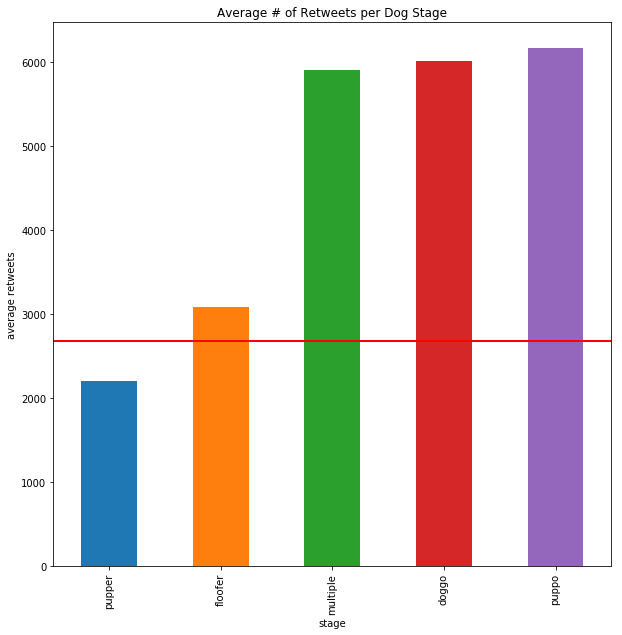

In [173]:
import matplotlib as plt
dogs.groupby('stage')['retweet_count'].mean().sort_values().plot(kind='bar',figsize=(10,10));
plt.pyplot.xlabel('stage');
plt.pyplot.ylabel('average retweets');
plt.pyplot.title('Average # of Retweets per Dog Stage');
plt.pyplot.axhline(dogs.retweet_count.mean(), color='red', linewidth=2);

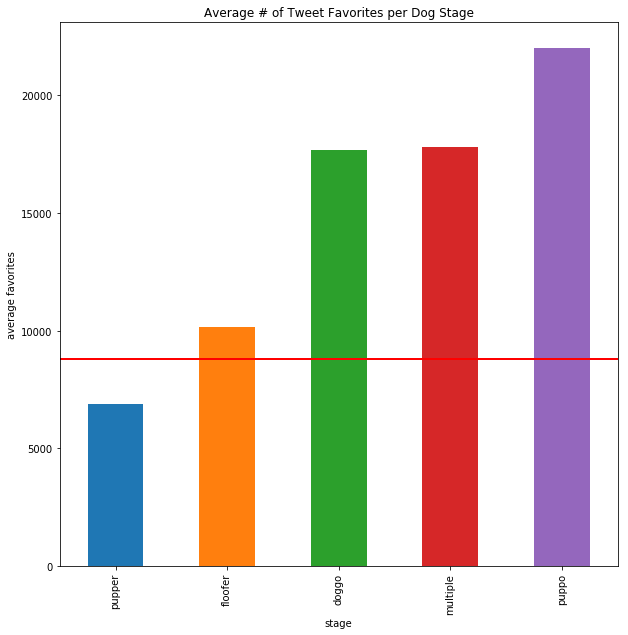

In [174]:
import matplotlib as plt
dogs.groupby('stage')['favorite_count'].mean().sort_values().plot(kind='bar',figsize=(10,10));
plt.pyplot.xlabel('stage');
plt.pyplot.ylabel('average favorites');
plt.pyplot.title('Average # of Tweet Favorites per Dog Stage');
plt.pyplot.axhline(dogs.favorite_count.mean(), color='red', linewidth=2);

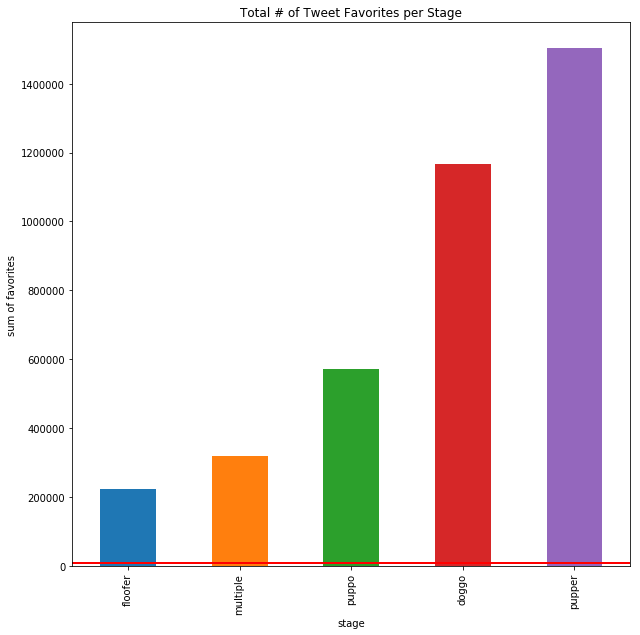

In [175]:
dogs.groupby('stage')['favorite_count'].sum().sort_values().plot(kind='bar',figsize=(10,10));
plt.pyplot.xlabel('stage');
plt.pyplot.ylabel('sum of favorites');
plt.pyplot.title('Total # of Tweet Favorites per Stage');
plt.pyplot.axhline(dogs.favorite_count.mean(), color='red', linewidth=2);

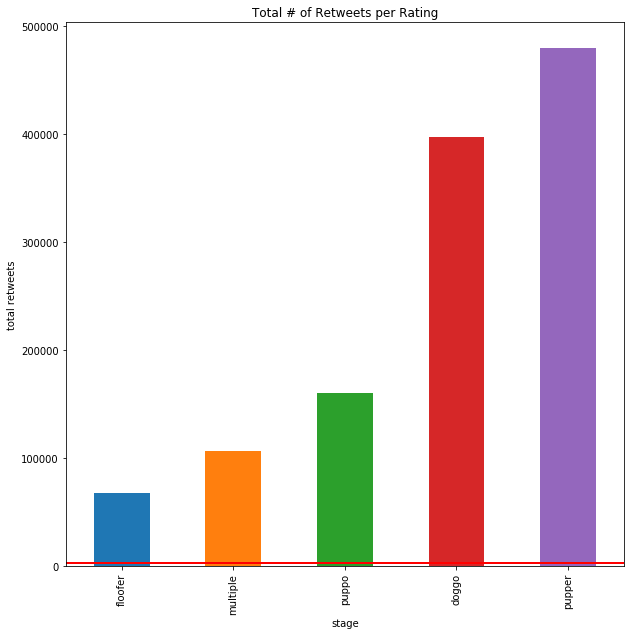

In [176]:
dogs.groupby('stage')['retweet_count'].sum().sort_values().plot(kind='bar',figsize=(10,10));
plt.pyplot.xlabel('stage');
plt.pyplot.ylabel('total retweets');
plt.pyplot.title('Total # of Retweets per Rating');
plt.pyplot.axhline(dogs.retweet_count.mean(), color='red', linewidth=2);

## Appendix:

Reference Materials:
- https://www.codementor.io/aviaryan/downloading-files-from-urls-in-python-77q3bs0un
- https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
- http://docs.tweepy.org/en/v3.2.0/api.html#API
- https://wiki.python.org/moin/HandlingExceptions
- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe/43424223
- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
- https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns
- https://jakevdp.github.io/WhirlwindTourOfPython/14-strings-and-regular-expressions.html
